In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(10,10)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam',metrics='accuracy')
model.fit(x_train,y_train_pad,epochs=30 )

Epoch 1/30
157/157 [==============================] - 1s 2ms/step - loss: 139687.7188 - accuracy: 0.2021
Epoch 2/30
157/157 [==============================] - 0s 3ms/step - loss: 138736.7031 - accuracy: 0.0179
Epoch 3/30
157/157 [==============================] - 0s 2ms/step - loss: 138677.8438 - accuracy: 0.0115
Epoch 4/30
157/157 [==============================] - 0s 2ms/step - loss: 138663.5781 - accuracy: 0.0064
Epoch 5/30
157/157 [==============================] - 0s 2ms/step - loss: 138670.5156 - accuracy: 0.0058
Epoch 6/30
157/157 [==============================] - 0s 2ms/step - loss: 138654.7656 - accuracy: 8.4400e-04
Epoch 7/30
157/157 [==============================] - 0s 2ms/step - loss: 138656.0938 - accuracy: 0.0014
Epoch 8/30
157/157 [==============================] - 0s 2ms/step - loss: 138654.2344 - accuracy: 6.4600e-04
Epoch 9/30
157/157 [==============================] - 0s 2ms/step - loss: 138653.4531 - accuracy: 0.0012
Epoch 10/30
157/157 [==========================

In [ ]:
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 9, 256)            5376      
                                                                 
 conv1d_25 (Conv1D)          (None, 8, 128)            65664     
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 4, 128)           0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               51300     
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                      

In [ ]:
history= model.fit(x=x_train,y=y_train_pad,validation_data=(x_test,y_test_pad),epochs = 25,batch_size = 256)

Epoch 1/25
20/20 [==============================] - 0s 18ms/step - loss: 138647.7969 - accuracy: 6.4600e-04 - val_loss: 621232.3750 - val_accuracy: 5.5000e-04
Epoch 2/25
20/20 [==============================] - 0s 14ms/step - loss: 138647.6250 - accuracy: 6.4600e-04 - val_loss: 621234.8750 - val_accuracy: 5.5000e-04
Epoch 3/25
20/20 [==============================] - 0s 15ms/step - loss: 138647.4844 - accuracy: 6.4600e-04 - val_loss: 621225.1875 - val_accuracy: 5.5000e-04
Epoch 4/25
20/20 [==============================] - 0s 15ms/step - loss: 138647.8906 - accuracy: 6.4600e-04 - val_loss: 621223.1250 - val_accuracy: 5.5000e-04
Epoch 5/25
20/20 [==============================] - 0s 14ms/step - loss: 138647.7344 - accuracy: 6.4600e-04 - val_loss: 621240.7500 - val_accuracy: 5.5000e-04
Epoch 6/25
20/20 [==============================] - 0s 14ms/step - loss: 138647.5469 - accuracy: 6.4600e-04 - val_loss: 621231.4375 - val_accuracy: 5.5000e-04
Epoch 7/25
20/20 [============================

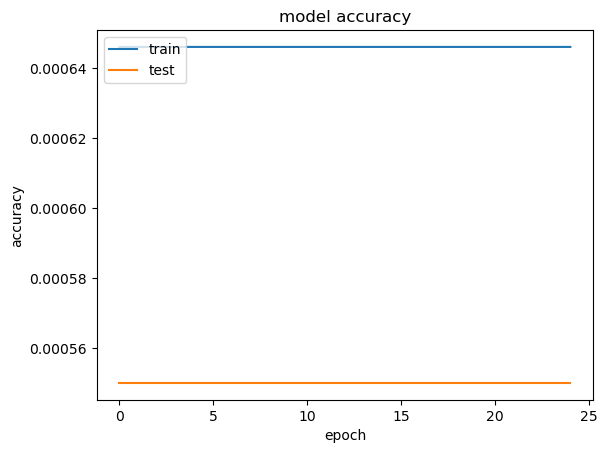

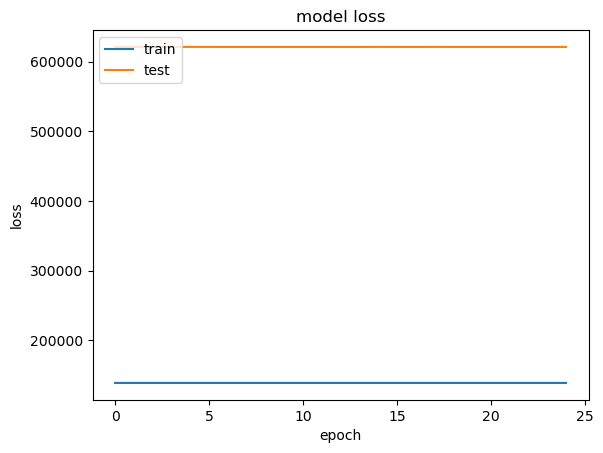

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Use this for testing

In [ ]:
model_test_loss , model_test_mse = model.evaluate(x_test,y_test_pad , batch_size=45 , verbose=1)
print(f'model test_loss: {model_test_loss}')
print(f'model test_mse: {model_test_mse}')

112/112 [==============================] - 0s 1ms/step - loss: 621234.4375 - accuracy: 5.5000e-04
model test_loss: 621234.4375
model test_mse: 0.0005499996477738023


In [ ]:
y_pred = model.predict(x_test)

157/157 [==============================] - 0s 1ms/step


In [ ]:
y_pred

array([[14.249073],
       [14.249073],
       [14.248715],
       ...,
       [14.249073],
       [14.249073],
       [14.248714]], dtype=float32)